**Name:** Mahendra Pratap Singh | **Reg ID:**  GO_STP_7372 | **Intern at:** Goeduhub Technologies | **Multiple Linear Regression**

#### Import Required Modules

In [3]:
from pandas import*
from numpy import*
from sklearn import*
from seaborn import*
from matplotlib import*

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

#### Uploading the dataset

In [112]:
data = read_csv("50_Startups.csv")
data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


#### EDA

In [114]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [115]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [116]:
data.shape # Row x columns = 50x5

(50, 5)

In [117]:
data.dtypes # all are numerical values except State columns

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [118]:
data["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [119]:
data["State"] = data["State"].replace(["New York"], 0)
data["State"] = data["State"].replace(["California"], 1)
data["State"] = data["State"].replace(["Florida"], 2)

In [120]:
data = data[["R&D Spend","Administration","Marketing Spend", "State","Profit"]]
data.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39


In [121]:
data.shape

(50, 5)

In [122]:
data['Profit'].max()

192261.83

In [123]:
data['Profit'].min()

14681.4

#### Data Preprocessing

In [124]:
data.isnull().sum() # We don't have any missing values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

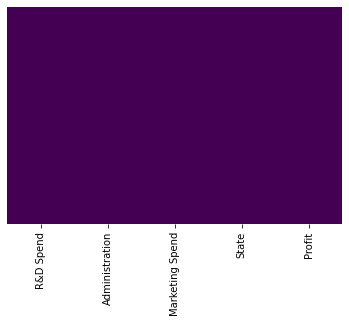

In [125]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

#### Feature Selection

In [126]:
x = data.drop('Profit', axis=1) # Predicting attribute ...........#2D
y = data['Profit'] # Y for model training .....#1D

#### Spliting The Dataset

In [127]:
from sklearn.model_selection import train_test_split

In [130]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0 )

#### Appling the regression model to our training data

In [131]:
mlr = LinearRegression() # creating an object of LinearRegression class
mlr.fit(xtrain,ytrain) # fitting the training data

LinearRegression()

In [132]:
Y_Pre_train = mlr.predict(xtrain)# actual y_train
Y_Pre_test = mlr.predict(xtest)#actual y_test

In [133]:
Y_Pre_test

array([103083.22418255, 132499.19098469, 132504.92013514,  72044.22079157,
       178578.88804813, 116196.18897916,  67901.09868183,  98843.64614762,
       114025.15059486, 167965.96780569])

In [134]:
data = pd.DataFrame(Y_Pre_test,ytest)
data.head(2)

,0
Profit,
103282.38,103083.224183
144259.40,132499.190985


#### Predicting the accuracy score

In [135]:
# Importing the modules
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [137]:
score = r2_score(ytest,Y_Pre_test)
print('r2 score is:',score*100)
print('mean_square_error is:',mean_squared_error(ytest,Y_Pre_test))
print('root_mean_squared error is:', np.sqrt(mean_squared_error(ytest,Y_Pre_test)))     

r2 score is: 93.48088470484865
mean_square_error is: 83372417.44786862
root_mean_squared error is: 9130.849765923685


#### Visualization

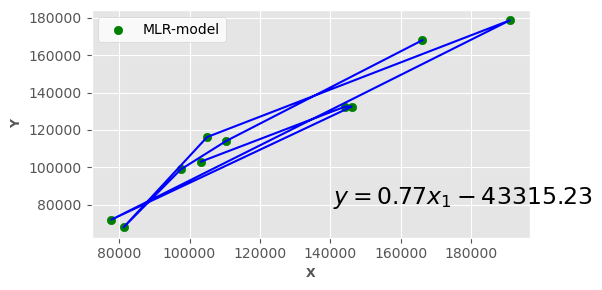

In [175]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(6,3))

ax.scatter(ytest, Y_Pre_test, color='green', label='MLR-model')
plt.plot(ytest,Y_Pre_test,color='blue')
ax.set_ylabel('Y', fontsize=9,weight = 'bold')
ax.set_xlabel('X', fontsize=9,weight = 'bold')
ax.legend(facecolor='white', fontsize=10)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (mlr.coef_[0], abs(mlr.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()